In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import os
os.chdir("/Users/gilgu/OneDrive/Escritorio")

In [11]:
df = pd.read_csv("drugs.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [12]:
# Renombrar las columnas:

col_names = ['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug']
df = pd.read_csv('drugs.csv', header=None, names=col_names)
df = df.iloc[1:,:]
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
1,23,F,HIGH,HIGH,25.355,drugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,drugY


In [13]:
# Establecer variables predictivas y a predecir:

feature_cols = ['age', 'sex', 'bp', 'cholesterol', 'na_to_k']
x = df[feature_cols].values
y = df.drug

In [14]:
# Convertir variables predictivas cualitativas a numéricas.

from sklearn import preprocessing

cod_sex = preprocessing.LabelEncoder()
cod_sex.fit(['M', 'F'])
x[:,1] = cod_sex.transform(x[:,1])

cod_bp = preprocessing.LabelEncoder()
cod_bp.fit(['LOW','NORMAL','HIGH'])
x[:,2] = cod_bp.transform(x[:,2])

cod_chol = preprocessing.LabelEncoder()
cod_chol.fit(['NORMAL','HIGH'])
x[:,3] = cod_chol.transform(x[:,3])

In [6]:
x

array([['23', 0, 0, 0, '25.355'],
       ['47', 1, 1, 0, '13.093'],
       ['47', 1, 1, 0, '10.114'],
       ['28', 0, 2, 0, '7.798'],
       ['61', 0, 1, 0, '18.043'],
       ['22', 0, 2, 0, '8.607'],
       ['49', 0, 2, 0, '16.275'],
       ['41', 1, 1, 0, '11.037'],
       ['60', 1, 2, 0, '15.171'],
       ['43', 1, 1, 1, '19.368'],
       ['47', 0, 1, 0, '11.767'],
       ['34', 0, 0, 1, '19.199'],
       ['43', 1, 1, 0, '15.376'],
       ['74', 0, 1, 0, '20.942'],
       ['50', 0, 2, 0, '12.703'],
       ['16', 0, 0, 1, '15.516'],
       ['69', 1, 1, 1, '11.455'],
       ['43', 1, 0, 0, '13.972'],
       ['23', 1, 1, 0, '7.298'],
       ['32', 0, 0, 1, '25.974'],
       ['57', 1, 1, 1, '19.128'],
       ['63', 1, 2, 0, '25.917'],
       ['47', 1, 1, 1, '30.568'],
       ['48', 0, 1, 0, '15.036'],
       ['33', 0, 1, 0, '33.486'],
       ['28', 0, 0, 1, '18.809'],
       ['31', 1, 0, 0, '30.366'],
       ['49', 0, 2, 1, '9.381'],
       ['39', 0, 1, 1, '22.697'],
       ['45', 1, 1

In [7]:
y

1      drugY
2      drugC
3      drugC
4      drugX
5      drugY
       ...  
196    drugC
197    drugC
198    drugX
199    drugX
200    drugX
Name: drug, Length: 200, dtype: object

In [19]:
# Creación de grupos de entrenamiento y prueba.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [20]:
# Entrenar y evaluar modelos de ensamble

from sklearn.ensemble import RandomForestClassifier


models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

Random Forest accuracy: 0.95
AdaBoost accuracy: 0.8333333333333334
Gradient Boosting accuracy: 0.9666666666666667


In [22]:
# Comparar con el árbol de decisión
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Precisión del árbol de decisión: {dt_accuracy}")

Precisión del árbol de decisión: 0.9666666666666667


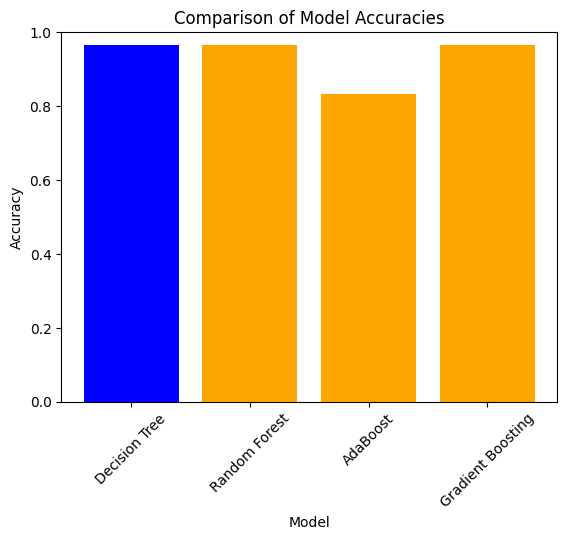

In [25]:
import matplotlib.pyplot as plt

ensemble_accuracies = {}

# Precisión del árbol de decisión
plt.bar("Decision Tree", dt_accuracy, color='blue')

# Precisión de los modelos de ensamble
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ensemble_accuracies[name] = accuracy
    plt.bar(name, accuracy, color='orange')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


# Recomendación: Basándonos en los resultados obtenidos, podríamos seleccionar el modelo que tenga la precisión más alta en el conjunto de prueba. En este caso, podríamos elegir el Gradient Boosting o el Random Forest, ya que ambos parecen tener una precisión relativamente alta.

# Comparación con el árbol de decisión: Podemos comparar la precisión de los modelos de ensamble con la precisión del árbol de decisión. Si la precisión de los modelos de ensamble es mayor que la del árbol de decisión, podemos concluir que sí ha mejorado el poder predictivo. En caso contrario, podríamos concluir que no ha mejorado.